Build the Friendship Graph, calculating the Influences

In [5]:
# from utils.friendship import GraphBuilder
# import pickle
# import os
# from os.path import join

# ### Test
# user = 'user.json'
# data_dir = 'data/raw'

# # Sample 10 entries from the json file
# fields = ['user_id','friends']
# n_samples = 120000
# G = GraphBuilder(user, data_dir).build_graph(n_samples, calculate_influence = True)

# home = os.path.expanduser('~')
# pkl = join(home, 'data/pkl/friendship.pkl')
# with open(pkl, 'wb') as f:
#     pickle.dump(G, f)

[0] N(nodes): 0
[0] N(edges): 0

[10000] N(nodes): 572098
[10000] N(edges): 1016194
[10000] N(nodes)/N(edges): 0.5630

[20000] N(nodes): 850060
[20000] N(edges): 1682199
[20000] N(nodes)/N(edges): 0.5053

[30000] N(nodes): 1094474
[30000] N(edges): 2318126
[30000] N(nodes)/N(edges): 0.4721

[40000] N(nodes): 1298589
[40000] N(edges): 2885366
[40000] N(nodes)/N(edges): 0.4501

[50000] N(nodes): 1551141
[50000] N(edges): 3527089
[50000] N(nodes)/N(edges): 0.4398

[60000] N(nodes): 1773430
[60000] N(edges): 4131718
[60000] N(nodes)/N(edges): 0.4292

[70000] N(nodes): 1875605
[70000] N(edges): 4405655
[70000] N(nodes)/N(edges): 0.4257

[80000] N(nodes): 2065953
[80000] N(edges): 4963206
[80000] N(nodes)/N(edges): 0.4163

[90000] N(nodes): 2280149
[90000] N(edges): 5642561
[90000] N(nodes)/N(edges): 0.4041

[100000] N(nodes): 2455635
[100000] N(edges): 6230531
[100000] N(nodes)/N(edges): 0.3941

[110000] N(nodes): 2582623
[110000] N(edges): 6638750
[110000] N(nodes)/N(edges): 0.3890

[12000

Map the business ids to names, for plotting purpose

In [2]:
import pickle

with open('./data/business_doc', 'rb') as f:
    doc_business = pickle.load(f)

from utils.preprocess import JSONLoader
city = ['Toronto']
categories = ['Burgers','Seafood','Italian','Chinese','Japanese']
business = 'business.json'
fields = ['business_id', 'name']
jl = JSONLoader(business, 'data/raw', fields = fields)
jl.set_condition(city=city, categories=categories, business_id = doc_business.keys())
f, b = jl.sample(10000000)
bid2name = dict(b)

import pickle
with open('./data/bid2name', 'wb') as f:
    pickle.dump(bid2name, f)

Load the user influence information

In [3]:
import pickle
import os
from os.path import join

home = os.path.expanduser('~')
pkl = join(home, 'data/pkl/friendship.pkl')
with open(pkl, 'rb') as f:
    G = pickle.load(f)

Make recommendations

In [4]:
from utils.recommender import Recommender

user_id = list(G.nodes())[0]
user_xy = (43.6744092, -79.4580342)
data_raw = 'data/raw'
data_pkl = 'data/pkl'
r = Recommender(data_raw, data_pkl, user_id, user_xy, G)

User id: lsSiIjAKVl-QRxKjRErBeg
User location: (43.674,-79.458)
The number of popular friends: 1256
The number of restaurants: 2051


In [5]:
cat = 'Seafood'
cat, ps, att, loc = r.recommend(cat)

The number of recommendations: 15


Plot

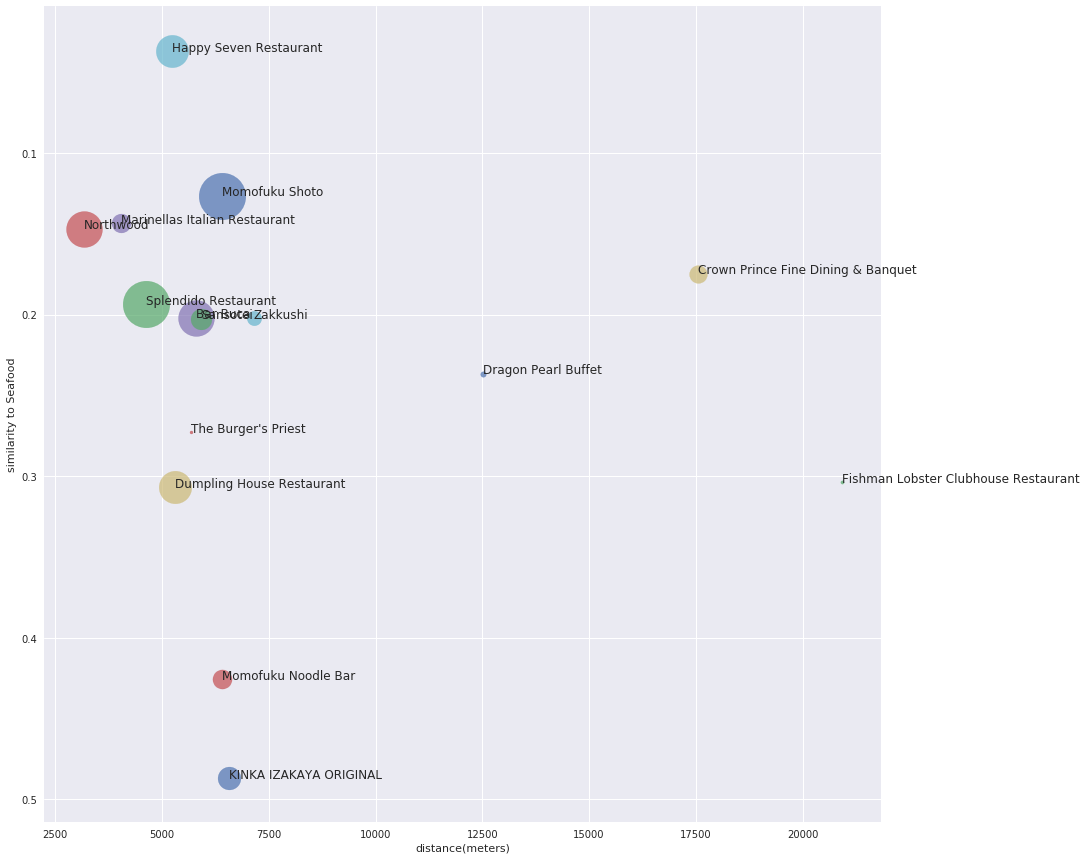

In [6]:
from utils.viz import scatterplot

scatterplot(cat, ps, att, loc)